In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import json
import numpy as np


In [25]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, stratify=df["Output"], shuffle=True)
    xTrain = train.drop(columns = ["Output"]).to_numpy()
    xTest = test.drop(columns = ["Output"]).to_numpy()
    yTrain = train["Output"].to_numpy()
    yTest = test["Output"].to_numpy()
    return xTrain, yTrain, xTest, yTest

In [26]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceNumberDataset")
datasets = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceNumberDataset")

file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/INVocab.json")
INVocab = json.load(file)

dfs = []
for file in datasets:
    df = pd.read_csv(file)
    dfs.append(df)

DF = pd.concat(dfs)

INdropCols = []
for col in INVocab.keys():
    if DF[col].max()==0 and DF[col].min()==0:
        INdropCols.append(col)
        INdropCols.append(col+"_X")
        INdropCols.append(col+"_Y")

DF.drop(columns=INdropCols, inplace=True)

In [27]:
print("IN : ", sum(INVocab.values()))

IN :  1172


In [29]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceNumberDataset")
datasetDir = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceNumberDataset")

In [30]:
dfs = []
for file in datasetDir:
    df = pd.read_csv(file)
    dfs.append(df)
data = pd.concat(dfs)
data.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4", "text", "Similarity", "Class", "CandidatePosition"], inplace=True)
data.drop(columns=INdropCols, inplace=True)

data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,cgste,cgste_X,cgste_Y,tunga,tunga_X,tunga_Y,kh,kh_X,kh_Y,Output
0,0.101767,0.206452,0.140251,0.220565,0.000000,0.000000,0.000000,-0.005783,0.035633,0.067944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.251140,0.697581,0.287343,0.706048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.251140,0.747581,0.287628,0.756048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.875998,0.206452,0.962657,0.220565,0.000000,0.000000,0.000000,-0.005783,0.833951,0.067944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.019608,0.344749,0.024314,0.352740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.743848,0.037957,0.779750,0.046518,-0.038794,0.169625,0.000143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.516727,0.294269,0.560661,0.301397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.716647,0.455090,0.753728,0.461933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.042386,0.000605,0.014542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.319629,0.628457,0.402660,0.635301,-0.038794,0.137848,0.076846,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014991,0.217251,0.010123,0.005024,0.088069,0.010978,0


In [31]:
data.drop_duplicates(keep="first", inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data

/tmp/ipykernel_5270/3802001468.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)


,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,cgste,cgste_X,cgste_Y,tunga,tunga_X,tunga_Y,kh,kh_X,kh_Y,Output
0,0.101767,0.206452,0.140251,0.220565,0.000000,0.000000,0.000000,-0.005783,0.035633,0.067944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.251140,0.697581,0.287343,0.706048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.251140,0.747581,0.287628,0.756048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.875998,0.206452,0.962657,0.220565,0.000000,0.000000,0.000000,-0.005783,0.833951,0.067944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.019608,0.344749,0.024314,0.352740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.743848,0.037957,0.779750,0.046518,-0.038794,0.169625,0.000143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
418,0.516727,0.294269,0.560661,0.301397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
419,0.716647,0.455090,0.753728,0.461933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.042386,0.000605,0.014542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
420,0.319629,0.628457,0.402660,0.635301,-0.038794,0.137848,0.076846,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014991,0.217251,0.010123,0.005024,0.088069,0.010978,0


In [32]:
data.isna().sum().sum()

0

In [33]:
data["Output"] = pd.to_numeric(data["Output"], errors='coerce')

In [34]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)
cols = dict.keys()
cols

dict_keys(['invoice', 'pitstop', 'order', 'id', 'service', 'date', 'delivery', 'registration', 'number', 'renault', 'pulse', 'diesel', 'odometer', 'from', 'to', 'cars', 'care', 'opp', 'trident', 'hyundai', 'showroom', 'kudlu', 'gate', 'hosur', 'main', 'road', 'bengaluru', 'gst', 'bumper', 'bracket', 'front', 'ac', 'repair', 'evaporator', 'cleaning', 'painting', 'charges', 'full', 'body', 'page', 'tax', 'enterprises', 'no', 'dated', 'near', 'rotery', 'community', 'center', 'dec', 'vikas', 'nagar', 'bundi', 'raj', 'note', 'of', 'payment', 'state', 'name', 'rajasthan', 'code', 'reference', 'other', 'references', 'dt', 'buyer', 'bill', 'tally', 'solutions', 'private', 'limited', 'amr', 'tech', 'park', 'ii', 'hongasandra', 'dispatch', 'doc', 'banglore', 'dispatched', 'through', 'destination', 'karnataka', 'terms', 'si', 'description', 'goods', 'quantity', 'rate', 'per', 'amount', 're', 'om', 'bussiness', 'promotional', 'activity', 'influencer', 'event', 'igst', 'total', 'chargeable', 'in', 

In [35]:
corrs = {}
for col in cols:
    if col in data.columns:
        c = data[col].corr(data["Output"])
        corrs[col] = abs(c)

corrs = sorted(corrs.items(), key=lambda x:x[1], reverse=True)

corrs

[('invoice', 0.40681412990230514),
 ('tax', 0.1953843453658631),
 ('irn', 0.18274719855085195),
 ('reference', 0.13960546014737765),
 ('description', 0.1346724421874198),
 ('no', 0.1328682435143403),
 ('cin', 0.12634166560144913),
 ('ee', 0.11990169820965942),
 ('sale', 0.11990169820965842),
 ('kenya', 0.11990169820965818),
 ('transaction', 0.11340388837745864),
 ('original', 0.11340388837745789),
 ('that', 0.113403888377457),
 ('gstin', 0.10366132702112107),
 ('total', 0.10260653942913592),
 ('inr', 0.09846088002336605),
 ('amount', 0.09435715543527884),
 ('to', 0.09143572289246922),
 ('thousand', 0.08966364925573841),
 ('registration', 0.08894896471986877),
 ('gstn', 0.08894896471986839),
 ('ack', 0.08894896471986825),
 ('customer', 0.08894896471986813),
 ('bill', 0.08775485420627484),
 ('number', 0.08664073726477438),
 ('park', 0.08565808354948423),
 ('ravindrapuri', 0.08468255125496159),
 ('shree', 0.08468255125496128),
 ('it', 0.08468255125496126),
 ('mishra', 0.08468255125496124)

In [36]:
len(data[data["Output"]==1])

105

In [37]:
len(data[data["Output"]==0])

317

In [38]:
xTrain, yTrain, xTest, yTest = extractData(data)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(xTrain, yTrain)

In [39]:
X_train_resampled.shape

(506, 3520)

In [40]:
len(y_train_resampled[y_train_resampled==1])

253

In [41]:
len(y_train_resampled[y_train_resampled==0])

253

In [42]:
xgb = XGBClassifier(objective = "binary:hinge", eval_metric = "error", n_estimators = 500, max_depth = 10, num_parallel_tree = 7, learning_rate = 0.09)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=7,
              objective='binary:hinge', predictor=None, ...)

In [43]:
pred = xgb.predict(xTest)

In [44]:
cm = confusion_matrix(pred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalP+totalN

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1))


Total :  85 

True +ve :   56       87.50 %
True -ve :   11       52.38 %
False +ve :  8        12.50 %
False -ve    10        47.62 %


Accuracy :   78.82 %


F1 Score :   0.86


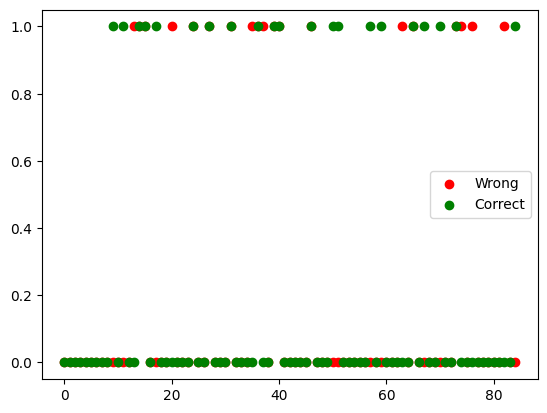

In [45]:
x = [x for x in range(len(xTest))]
plt.scatter(x, pred, color="red")
plt.scatter(x, yTest, color="green")
plt.legend(["Wrong", "Correct"])
plt.show()

In [48]:
params = {
    "n_estimators" : [300, 400, 500],
    "max_depth" : [8, 9, 10, 11],
    "learning_rate" : [0.07, 0.09, 0.1, 0.4],
    "num_parallel_tree" : [8, 9, 10],
    "reg_alpha" : [1.1, 1.3, 1.5, 1.7, 1.9],
    "reg_lambda" : [1.1, 1.3, 1.5, 1.7, 1.9]
}

# params = {
#     "n_estimators" : [200, 300, 400, 500],
#     "max_depth" : [5, 10, 15, 20],
#     "learning_rate" : [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
#     "num_parallel_tree" : [6, 7, 8],
#     "reg_alpha" : [1.4, 1.5, 1.6],
#     "reg_lambda" : [1.4, 1.5, 1.6]
# }

# params = {
#     "n_estimators" : [500],
#     "max_depth" : [10],
#     "learning_rate" : [0.07],
#     "num_parallel_tree" : [9],
#     "reg_alpha" : [1.7],
#     "reg_lambda" : [1.9]
# }

In [49]:
gridXGB = RandomizedSearchCV(xgb, params, n_jobs=-1, scoring="f1", n_iter=10, cv=5)
gridXGB.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=7,
                                           objective='binary:hinge',
                                           predictor=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.09, 0.1, 0.4],
                                        'max_depth': [8, 9, 10, 11],
                                        'n_estimators': [300, 400, 500],
                                        'num_parallel_tree': [8, 9, 10],
                                        'reg_alpha': [1.1, 1.3, 1.5, 1.7, 1.9],
                                        'reg_lambda': [1.1, 1.3, 1.5, 1.7,
                                                       1.9]},
                   scoring='f1')

In [50]:
bestParams = gridXGB.best_params_
bestParams

{'reg_lambda': 1.3,
 'reg_alpha': 1.9,
 'num_parallel_tree': 9,
 'n_estimators': 500,
 'max_depth': 9,
 'learning_rate': 0.09}

In [51]:
bestModel = gridXGB.best_estimator_

In [52]:
yPred = bestModel.predict(xTest)

In [53]:
cm = confusion_matrix(yPred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalN + totalP

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1))



Total :  85 

True +ve :   60       93.75 %
True -ve :   13       61.90 %
False +ve :  4        6.25 %
False -ve    8        38.10 %


Accuracy :   85.88 %


F1 Score :   0.91


In [54]:
bestModel.save_model("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Models/XGBoostModelIN")